In [1]:
import os
import urllib.request

In [2]:
filepath = '/content/the-verdict.txt'

In [3]:
with open ("/content/the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

In [4]:
raw_text

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\'s going to send the value of my picture \'way up; but I don\'t think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing\'s lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\'s "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?\n\nWell!--even 

In [5]:
import re

In [6]:
result = re.split(r'[!.,:;?_"()\']+|\s+', raw_text)
result = [item.strip() for item in result if item.strip()]
print(result)


['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius--though', 'a', 'good', 'fellow', 'enough--so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', 'in', 'the', 'height', 'of', 'his', 'glory', 'he', 'had', 'dropped', 'his', 'painting', 'married', 'a', 'rich', 'widow', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', 'The', 'height', 'of', 'his', 'glory', '--that', 'was', 'what', 'the', 'women', 'called', 'it', 'I', 'can', 'hear', 'Mrs', 'Gideon', 'Thwing--his', 'last', 'Chicago', 'sitter--deploring', 'his', 'unaccountable', 'abdication', 'Of', 'course', 'it', 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', 'way', 'up', 'but', 'I', 'don', 't', 'think', 'of', 'that', 'Mr', 'Rickham--the', 'loss', 'to', 'Arrt', 'is', 'all', 'I', 'think', 'of', 'The', 'word', 'on', 'Mrs', 'Thwing', 's', 'lips', 

In [7]:
preprocessed = result
len(preprocessed)

3701

In [8]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

In [9]:
print(vocab_size)

1189


In [10]:
vocab={token : integer for integer, token in enumerate(all_words)}

In [11]:
vocab

{'--and': 0,
 '--even': 1,
 '--it': 2,
 '--oh': 3,
 '--she': 4,
 '--that': 5,
 'A': 6,
 'Ah': 7,
 'Ah--I': 8,
 'Among': 9,
 'And': 10,
 'Are': 11,
 'Arrt': 12,
 'As': 13,
 'At': 14,
 'Be': 15,
 'Begin': 16,
 'Burlington': 17,
 'But': 18,
 'By': 19,
 'Carlo': 20,
 'Chicago': 21,
 'Claude': 22,
 'Come': 23,
 'Croft': 24,
 'Destroyed': 25,
 'Devonshire': 26,
 'Don': 27,
 'Dubarry': 28,
 'Emperors': 29,
 'Florence': 30,
 'For': 31,
 'Gallery': 32,
 'Gideon': 33,
 'Gisburn': 34,
 'Gisburn--as': 35,
 'Gisburn--fond': 36,
 'Gisburns': 37,
 'Grafton': 38,
 'Greek': 39,
 'Grindle': 40,
 'Grindles': 41,
 'HAD': 42,
 'Had': 43,
 'Hang': 44,
 'Has': 45,
 'He': 46,
 'Her': 47,
 'Hermia': 48,
 'His': 49,
 'How': 50,
 'I': 51,
 'If': 52,
 'In': 53,
 'It': 54,
 'Jack': 55,
 'Jack--one': 56,
 'Jove': 57,
 'Jove--a': 58,
 'Just': 59,
 'Lord': 60,
 'Made': 61,
 'Miss': 62,
 'Money': 63,
 'Monte': 64,
 'Moon-dancers': 65,
 'Mr': 66,
 'Mrs': 67,
 'My': 68,
 'Never': 69,
 'No--for': 70,
 'Now': 71,
 'Nutley

In [12]:
class SimpleTokenzier:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {i: s for s, i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'[!.,:;?_"()\']+|\s+', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([.,:;?!()\'"])', r'\1', text)
    return text


In [13]:
tokenizer = SimpleTokenzier(vocab)

In [14]:
text = """" I like atmosphere. """

In [15]:
ids = tokenizer.encode(text)
print(ids)

[51, 656, 190]


In [16]:
tokenizer.decode(ids)

'I like atmosphere'

In [17]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab={token : integer for integer, token in enumerate(all_tokens)}

In [18]:
class SimpleTokenzier2:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {i: s for s, i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'[!.,:;?_"()\']+|\s+', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [ item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([.,:;?!()\'"])', r'\1', text)
    return text




In [19]:
tokenizer2 = SimpleTokenzier2(vocab)

In [20]:
text1 = "hello , how are you."

In [21]:
tokenizer2.encode(text1)

[1190, 581, 178, 1184]

In [22]:
tokenizer2.decode(tokenizer2.encode(text1))

'<|unk|> how are you'

BYTE PAIR ENCODING

In [23]:
import tiktoken

In [24]:
toknizer = tiktoken.get_encoding("gpt2")

In [25]:
toknizer.n_vocab

50257

In [26]:
enc_text = toknizer.encode(raw_text)
print(len(enc_text))

5145


In [27]:
enc_sample = enc_text[50:]

In [28]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]


print(f"x:  {x}")
print(f"y:      {y}")

x:  [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [29]:
import torch

In [30]:
from torch.utils.data import Dataset,DataLoader

In [31]:
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i : i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length + 1]

            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]








In [32]:
def create_dataloader_v1 (txt, batch_size = 4, max_length = 256, stride = 128, shuffle = True, drop_last=True, num_workers = 0):
  toknizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(txt, toknizer, max_length, stride)


  dataloader = DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      drop_last=drop_last,
      num_workers=num_workers
  )

  return dataloader

In [33]:
#we can increase the number of strides to avoid LLM from seeing same tokens multiple times


In [34]:
#increase number of batch to 8 and stride to 4 and check inputs and outputs using inputs,outputs=next(data_iter)

In [35]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [36]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [37]:
input_ids = torch.tensor([2,3,4,1])

In [38]:
vocab_size=6
output_dim=3

torch.manual_seed(1234)
embedding_layer = torch.nn.Embedding(toknizer.n_vocab, output_dim)

In [39]:
print(embedding_layer.weight)

Parameter containing:
tensor([[-0.1117, -0.4966,  0.1631],
        [-0.8817,  0.0539,  0.6684],
        [-0.0597, -0.4675, -0.2153],
        ...,
        [ 0.2907,  0.1357, -0.7934],
        [ 0.1017, -0.2937,  1.1388],
        [ 1.6923, -1.7403, -0.1949]], requires_grad=True)


In [40]:
embedding_layer(input_ids)

tensor([[-0.0597, -0.4675, -0.2153],
        [ 0.8840, -0.7584, -0.3689],
        [-0.3424, -1.4020,  0.3206],
        [-0.8817,  0.0539,  0.6684]], grad_fn=<EmbeddingBackward0>)

In [41]:
vocab_size=toknizer.n_vocab
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [42]:
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)

In [43]:
data_iter = iter(dataloader)
inputs,targets= next(data_iter)

In [44]:
print(inputs)
print(inputs.shape)

tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
torch.Size([8, 4])


In [45]:
token_embedding = token_embedding_layer(inputs)
token_embedding.shape

torch.Size([8, 4, 256])

In [46]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length,output_dim)

In [47]:
pos_embedding_layer.weight

Parameter containing:
tensor([[ 0.1076, -0.1631, -0.1190,  ...,  0.5614, -0.4727, -0.0972],
        [ 0.0024,  0.8058,  1.6098,  ..., -1.2229, -0.1130,  0.4425],
        [-0.1245,  0.1281,  0.9833,  ...,  0.2299,  0.1095, -1.3547],
        [ 0.1320,  0.1865, -1.3751,  ..., -1.3680,  0.4121, -0.1078]],
       requires_grad=True)

In [48]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
pos_embeddings.shape

torch.Size([4, 256])

In [49]:
pos_embeddings

tensor([[ 0.1076, -0.1631, -0.1190,  ...,  0.5614, -0.4727, -0.0972],
        [ 0.0024,  0.8058,  1.6098,  ..., -1.2229, -0.1130,  0.4425],
        [-0.1245,  0.1281,  0.9833,  ...,  0.2299,  0.1095, -1.3547],
        [ 0.1320,  0.1865, -1.3751,  ..., -1.3680,  0.4121, -0.1078]],
       grad_fn=<EmbeddingBackward0>)

In [50]:
input_embeddings = token_embedding + pos_embeddings
input_embeddings.shape

torch.Size([8, 4, 256])

SINGLE HEAD ATTENTION

In [51]:
import torch

In [52]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],   # Your     (x^1)
     [0.55, 0.87, 0.66],   # journey  (x^2)
     [0.57, 0.85, 0.64],   # starts   (x^3)
     [0.27, 0.58, 0.33],   # with     (x^4)
     [0.77, 0.25, 0.10],   # one      (x^5)
     [0.05, 0.80, 0.55]]   # step     (x^6)
)


In [53]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8709, 0.7070, 1.0865])


In [54]:
context_vec_2 = torch.empty(query.shape)

for i ,x_i in enumerate(inputs):
    context_vec_2 += attn_scores_2[i] * x_i

print(context_vec_2)


tensor([-4.2241e+21,  4.2490e+00,  3.7360e+00])


In [55]:
query = inputs[1]

attn_scores = torch.empty(6,6)


attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
      attn_scores[i,j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4968, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8709, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8581, 0.7154, 1.0605],
        [0.4968, 0.8709, 0.8581, 0.5182, 0.3859, 0.6590],
        [0.4576, 0.7070, 0.7154, 0.3859, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6590, 0.2935, 0.9450]])


In [56]:
atscores = inputs @ inputs.T
print(atscores)

tensor([[0.9995, 0.9544, 0.9422, 0.4968, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8709, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8581, 0.7154, 1.0605],
        [0.4968, 0.8709, 0.8581, 0.5182, 0.3859, 0.6590],
        [0.4576, 0.7070, 0.7154, 0.3859, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6590, 0.2935, 0.9450]])


In [57]:
att_weights = torch.nn.functional.softmax(atscores, dim=1)
print(att_weights)

tensor([[0.2093, 0.2000, 0.1976, 0.1266, 0.1217, 0.1448],
        [0.1381, 0.2371, 0.2325, 0.1270, 0.1078, 0.1576],
        [0.1385, 0.2361, 0.2318, 0.1273, 0.1104, 0.1559],
        [0.1432, 0.2082, 0.2056, 0.1463, 0.1282, 0.1685],
        [0.1518, 0.1948, 0.1964, 0.1413, 0.1869, 0.1288],
        [0.1384, 0.2183, 0.2127, 0.1424, 0.0988, 0.1895]])


In [58]:
all_cont_vecs = att_weights @ inputs
print(all_cont_vecs)

tensor([[0.4478, 0.5931, 0.5783],
        [0.4475, 0.6512, 0.5675],
        [0.4487, 0.6493, 0.5662],
        [0.4399, 0.6291, 0.5502],
        [0.4728, 0.5909, 0.5255],
        [0.4248, 0.6503, 0.5645]])


In [59]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [60]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out))
W_key = torch.nn.Parameter(torch.rand(d_in, d_out))
W_value = torch.nn.Parameter(torch.rand(d_in, d_out))

In [61]:
query_2 = x_2 @ W_query
query_2

tensor([0.4306, 1.4551], grad_fn=<SqueezeBackward4>)

In [62]:
keys = inputs @ W_key
keys.shape

torch.Size([6, 2])

In [63]:
values = inputs @ W_value
values.shape

torch.Size([6, 2])

In [64]:
ateention_scores = query_2 @ keys.T
ateention_scores

tensor([1.2705, 1.8524, 1.8111, 1.0899, 0.5577, 1.5440],
       grad_fn=<SqueezeBackward4>)

In [65]:
d_k = keys.shape[1]

attn_weights = torch.nn.functional.softmax(ateention_scores / d_k**0.5, dim=-1)
attn_weights

tensor([0.1499, 0.2262, 0.2197, 0.1319, 0.0905, 0.1819],
       grad_fn=<SoftmaxBackward0>)

In [66]:
context_vectors = attn_weights @ values
context_vectors

tensor([0.3065, 0.8221], grad_fn=<SqueezeBackward4>)

In [67]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = torch.nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        queries = inputs @ self.W_query
        keys = inputs @ self.W_key
        values = inputs @ self.W_value

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=1)
        context_vec = attn_weights @ values

        return context_vec

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
sa_v1(inputs)


tensor([[0.3001, 0.8065],
        [0.3065, 0.8221],
        [0.3062, 0.8213],
        [0.2958, 0.7964],
        [0.2932, 0.7904],
        [0.2995, 0.8053]], grad_fn=<MmBackward0>)

In [68]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = torch.nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        queries = self.W_query(inputs)
        keys = self.W_key(inputs)
        values = self.W_value(inputs)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=1)
        context_vec = attn_weights @ values

        return context_vec

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
sa_v2(inputs)


tensor([[-0.0719,  0.0752],
        [-0.0729,  0.0741],
        [-0.0730,  0.0741],
        [-0.0740,  0.0725],
        [-0.0743,  0.0720],
        [-0.0735,  0.0733]], grad_fn=<MmBackward0>)

In [69]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
values = sa_v2.W_value(inputs)

attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=1)


In [70]:
attn_weights

tensor([[0.1919, 0.1644, 0.1650, 0.1560, 0.1719, 0.1508],
        [0.2038, 0.1656, 0.1660, 0.1508, 0.1662, 0.1475],
        [0.2033, 0.1657, 0.1660, 0.1510, 0.1662, 0.1478],
        [0.1874, 0.1665, 0.1667, 0.1575, 0.1659, 0.1559],
        [0.1829, 0.1667, 0.1668, 0.1594, 0.1657, 0.1584],
        [0.1933, 0.1662, 0.1664, 0.1551, 0.1664, 0.1527]],
       grad_fn=<SoftmaxBackward0>)

In [71]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)



tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [72]:
masked_simple = attn_weights * mask_simple
masked_simple


tensor([[0.1919, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2038, 0.1656, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2033, 0.1657, 0.1660, 0.0000, 0.0000, 0.0000],
        [0.1874, 0.1665, 0.1667, 0.1575, 0.0000, 0.0000],
        [0.1829, 0.1667, 0.1668, 0.1594, 0.1657, 0.0000],
        [0.1933, 0.1662, 0.1664, 0.1551, 0.1664, 0.1527]],
       grad_fn=<MulBackward0>)

In [73]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2763, 0.2456, 0.2458, 0.2323, 0.0000, 0.0000],
        [0.2173, 0.1981, 0.1982, 0.1894, 0.1969, 0.0000],
        [0.1933, 0.1662, 0.1664, 0.1551, 0.1664, 0.1527]],
       grad_fn=<DivBackward0>)


In [74]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)


tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2725, 0.1057, 0.1070, 0.0269,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0236, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0297, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [75]:
attn_weights = torch.softmax(masked / d_k**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2763, 0.2456, 0.2458, 0.2323, 0.0000, 0.0000],
        [0.2173, 0.1981, 0.1982, 0.1894, 0.1969, 0.0000],
        [0.1933, 0.1662, 0.1664, 0.1551, 0.1664, 0.1527]],
       grad_fn=<SoftmaxBackward0>)


In [76]:
torch.manual_seed(123)

layer = torch.nn.Dropout(0.5)

layer(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5527, 0.4912, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4347, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3323, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

In [77]:
batch = torch.stack((inputs,inputs),dim=0)
batch.shape

torch.Size([2, 6, 3])

In [78]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.W_query = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = torch.nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = torch.nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b,num_tokens,d_in = x.shape
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2)  # Changed transpose
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
        )  # New, ops are in-place

        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        attn_weights = self.dropout(attn_weights)  # New
        context_vec = attn_weights @ values

        return context_vec



torch.manual_seed(789)
context_length=batch.shape[1]
dropout = 0.0
ca = CausalAttention(d_in, d_out, context_length, dropout)
ca(batch)

tensor([[[-0.0872,  0.0286],
         [-0.0991,  0.0501],
         [-0.0999,  0.0633],
         [-0.0953,  0.0549],
         [-0.0491,  0.1147],
         [-0.0735,  0.0733]],

        [[-0.0872,  0.0286],
         [-0.0991,  0.0501],
         [-0.0999,  0.0633],
         [-0.0953,  0.0549],
         [-0.0491,  0.1147],
         [-0.0735,  0.0733]]], grad_fn=<UnsafeViewBackward0>)

MULTI HEAD ATTENTION

In [79]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads=2, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList([
            CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)
        ])

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


torch.manual_seed(123)

context_length = batch.shape[1]
d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout=0.0, num_heads=2)
mha(batch)


tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5736, -0.0857,  0.5541,  0.3620],
         [-0.5572, -0.0992,  0.5369,  0.3452],
         [-0.5339, -0.1090,  0.5118,  0.3514]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5736, -0.0857,  0.5541,  0.3620],
         [-0.5572, -0.0992,  0.5369,  0.3452],
         [-0.5339, -0.1090,  0.5118,  0.3514]]], grad_fn=<CatBackward0>)

In [80]:
class MultiHeadAttention2(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )


    def forward(self, x):
      b, num_tokens, d_in = x.shape

      keys = self.W_key(x)      # Shape: (b, num_tokens, d_out)
      queries = self.W_query(x)
      values = self.W_value(x)

    # We implicitly split the matrix by adding a `num_heads` dimension
    # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
      keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
      values = values.view(b, num_tokens, self.num_heads, self.head_dim)
      queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

    # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
      keys = keys.transpose(1, 2)
      queries = queries.transpose(1, 2)
      values = values.transpose(1, 2)

    # Compute scaled dot-product attention (aka self-attention) with a causal mask
      attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

    # Original mask truncated to the number of tokens and converted to boolean
      mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

      # Use the mask to fill attention scores
      attn_scores.masked_fill_(mask_bool, -torch.inf)

      attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
      attn_weights = self.dropout(attn_weights)


      context_vec = (attn_weights @ values).transpose(1, 2)


      context_vec = context_vec.reshape(b, num_tokens, self.d_out)
      context_vec = self.out_proj(context_vec)

      return context_vec

torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape

d_out = 4

mha2 = MultiHeadAttention2(d_in, d_out, context_length, dropout=0.0, num_heads=2)
context_vec = mha2(batch)

print(context_vec)
print(context_vec.shape)

tensor([[[ 0.1184,  0.3120, -0.0847, -0.5774],
         [ 0.0178,  0.3221, -0.0763, -0.4225],
         [-0.0147,  0.3259, -0.0734, -0.3721],
         [-0.0130,  0.3139, -0.0709, -0.3609],
         [-0.0129,  0.2973, -0.0698, -0.3530],
         [-0.0142,  0.2991, -0.0689, -0.3480]],

        [[ 0.1184,  0.3120, -0.0847, -0.5774],
         [ 0.0178,  0.3221, -0.0763, -0.4225],
         [-0.0147,  0.3259, -0.0734, -0.3721],
         [-0.0130,  0.3139, -0.0709, -0.3609],
         [-0.0129,  0.2973, -0.0698, -0.3530],
         [-0.0142,  0.2991, -0.0689, -0.3480]]], grad_fn=<ViewBackward0>)
torch.Size([2, 6, 4])


LLM ARCHITECTURE


In [81]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}


In [82]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits



class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x


In [83]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

batch = torch.stack(batch, dim=0)
print(batch)


tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [84]:
batch.shape

torch.Size([2, 4])

In [85]:
torch.manual_seed(123)

In [86]:
model = DummyGPTModel(cfg=GPT_CONFIG_124M)
logits = model(batch)
print(logits.shape)
print(logits)

torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


In [87]:
torch.manual_seed(123)

batch_example = torch.randn(1, 2,5)
batch_example

tensor([[[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
         [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]]])

In [88]:
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU())
out = layer(batch_example)
out

tensor([[[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
         [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]]],
       grad_fn=<ReluBackward0>)

In [89]:
mean = out.mean(dim=-1,keepdim=True)

In [90]:
var = out.var(dim=-1,keepdim=True)

In [91]:
normed = ((out - mean)/torch.sqrt(var))
normed.var(dim=-1,keepdim=True)

tensor([[[1.0000],
         [1.0000]]], grad_fn=<VarBackward0>)

In [92]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift


In [93]:
ln = LayerNorm(6)
out_normed = ln(out)

In [94]:
out_normed

tensor([[[ 0.6745,  1.5470, -0.9549,  0.6431, -0.9549, -0.9549],
         [-0.0207,  0.1228, -1.1913,  1.6619,  0.6186, -1.1913]]],
       grad_fn=<AddBackward0>)

In [95]:
out_normed.var(dim=-1,keepdim=True)

tensor([[[1.1994],
         [1.1996]]], grad_fn=<VarBackward0>)

In [96]:
out_normed.mean(dim=-1,keepdim=True)

tensor([[[ 0.0000e+00],
         [-1.9868e-08]]], grad_fn=<MeanBackward1>)

In [97]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


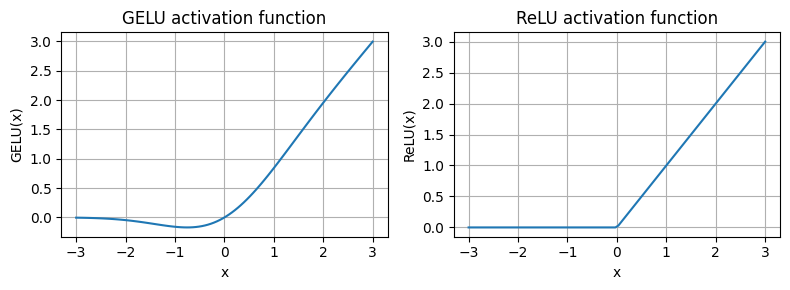

In [98]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [99]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)


In [100]:
ffn = FeedForward(GPT_CONFIG_124M)


In [101]:
x = torch.rand(2,3,768)
ffn(x).shape

torch.Size([2, 3, 768])

In [102]:
ffn.layers

Sequential(
  (0): Linear(in_features=768, out_features=3072, bias=True)
  (1): GELU()
  (2): Linear(in_features=3072, out_features=768, bias=True)
)

In [103]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU()),
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x




def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")


In [104]:
layer_sizes = [3,3,3,3,3,1]

In [105]:
sample_input = torch.tensor([[-1.,0.,1.]])

In [106]:
torch.manual_seed(123)

model_without_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=False)


print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.0002546171599533409
layers.1.0.weight has gradient mean of 8.308066026074812e-05
layers.2.0.weight has gradient mean of 0.0007468174444511533
layers.3.0.weight has gradient mean of 0.001237659016624093
layers.4.0.weight has gradient mean of 0.004640596453100443


In [107]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=True)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.022350549697875977
layers.1.0.weight has gradient mean of 0.04712463542819023
layers.2.0.weight has gradient mean of 0.027912266552448273
layers.3.0.weight has gradient mean of 0.013673192821443081
layers.4.0.weight has gradient mean of 0.2339744120836258


In [108]:


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention2(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])


    def forward(self, x):
    # Shortcut connection for attention block
     shortcut = x
     x = self.norm1(x)
     x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
     x = self.drop_shortcut(x)
     x = x + shortcut  # Add the original input back

    # Shortcut connection for feed forward block
     shortcut = x
     x = self.norm2(x)
     x = self.ff(x)
     x = self.drop_shortcut(x)
     x = x + shortcut  # Add the original input back

     return x


In [109]:
torch.manual_seed(123)
x = torch.rand(2,4,768)

block= TransformerBlock(GPT_CONFIG_124M)
outpu = block(x)

In [110]:
outpu.shape

torch.Size([2, 4, 768])

In [111]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


In [112]:
batch.shape

torch.Size([2, 4])

In [113]:
torch.manual_seed(123)

model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print(out.shape)


torch.Size([2, 4, 50257])


In [114]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 163009536


In [115]:
print(f"{total_params - model.out_head.weight.numel():,}")

124,412,160


In [116]:
start_context = "Hello, I am"

encoded = tokenizer.encode(start_context)
print(encoded)

[15496, 11, 314, 716]


In [117]:
encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print(encoded_tensor)

tensor([[15496,    11,   314,   716]])


In [118]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]

        with torch.no_grad():
            logits = model(idx_cond)
            logits = logits[:, -1, :]

        probas = torch.softmax(logits, dim=-1)

        idx_next = torch.argmax(probas, dim=-1, keepdim=True)

        idx = torch.cat((idx, idx_next), dim=1)

    return idx


In [119]:
out = generate_text_simple(model=model, idx=encoded_tensor, max_new_tokens=6, context_size=GPT_CONFIG_124M['context_length'])

In [120]:
out

tensor([[15496,    11,   314,   716, 46302,  5748, 32746, 18641, 24436, 21950]])

In [121]:
tokenizer.decode((out.squeeze(0)).tolist())

'Hello, I am786hips smoot disappointment nationalismComponent'

In [122]:
from importlib.metadata import version

In [123]:
pkgs = [
    "matplotlib",
    "numpy",
    "tiktoken",
    "torch",
    "tensorflow"
]

for p in pkgs:
    print(f"{p} version: {version(p)}")

matplotlib version: 3.10.0
numpy version: 2.0.2
tiktoken version: 0.9.0
torch version: 2.6.0+cu124
tensorflow version: 2.18.0


In [124]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}


In [125]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_featur

In [126]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)  # add batch dimension
    return encoded_tensor

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids=text_to_token_ids(start_context, tokenizer)
token_ids

tensor([[6109, 3626, 6100,  345]])

In [127]:
def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

token_ids_to_text(token_ids, tokenizer)

'Every effort moves you'

In [128]:
token_ids = generate_text_simple(model=model, idx=text_to_token_ids(start_context, tokenizer), max_new_tokens=10, context_size=GPT_CONFIG_124M['context_length'])
token_ids

tensor([[ 6109,  3626,  6100,   345, 34245,  5139,  2492, 25405, 17434, 17853,
          5308,  3398, 13174, 43071]])

In [129]:
token_ids.squeeze(0).shape

torch.Size([14])

In [130]:
token_ids_to_text(token_ids, tokenizer)

'Every effort moves you rentingetic wasnم refres RexMeCHicular stren'

In [131]:
inputs = torch.tensor([[16833, 3626, 6100],     # "every effort moves",
                       [   40, 1107,  588]])    # "I really like"

targets = torch.tensor([[ 3626, 6100,   345],   # "effort moves you",
                        [1107,  588, 11311]])   # "really like chocolate"

with torch.no_grad():
    logits = model(inputs)




In [132]:
logits.shape

torch.Size([2, 3, 50257])

In [133]:
probas = torch.softmax(logits, dim=-1)
probas.shape


torch.Size([2, 3, 50257])

In [134]:
token_ids = torch.argmax(probas, dim=-1, keepdim = True)
token_ids

tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])

In [135]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")


Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


In [136]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)



Text 1: tensor([7.4540e-05, 3.1061e-05, 1.1563e-05])


In [137]:
text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)



Text 2: tensor([1.0337e-05, 5.6776e-05, 4.7559e-06])


In [138]:
torch.log(torch.tensor(1))



tensor(0.)

In [139]:
# Compute logarithm of all token probabilities
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)



tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [140]:
-1 * torch.mean(log_probas)

tensor(10.7940)

In [141]:
logits_flat = logits.flatten(0,1)
targets_flat = targets.flatten()

In [142]:
torch.nn.functional.cross_entropy(logits_flat, targets_flat)

tensor(10.7940)

In [143]:
with open ("/content/the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

In [144]:
raw_text

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\'s going to send the value of my picture \'way up; but I don\'t think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing\'s lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\'s "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?\n\nWell!--even 

In [145]:
total_characters = len(raw_text)
total_tokens  = len(tokenizer.encode(raw_text))

print(total_characters)
print(total_tokens)

20479
5145


In [146]:
0.9*len(raw_text)

18431.100000000002

In [147]:
train_ratio = 0.90
split_idx = int(train_ratio * len(raw_text))

train_data = raw_text[:split_idx]
val_data = raw_text[split_idx:]

In [148]:
torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)


In [149]:
for x, y in train_loader:
  print(x.shape, y.shape)


torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])


In [150]:
for x, y in val_loader:
  print(x.shape, y.shape)


torch.Size([2, 256]) torch.Size([2, 256])


In [151]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)


Training tokens: 4608
Validation tokens: 512
All tokens: 5120


In [152]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [153]:
torch.cuda.is_available()

True

In [154]:
model.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_featur

In [155]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches


In [156]:
torch.manual_seed(123)  # For reproducibility due to the shuffling in the data loader

with torch.no_grad():  # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)


Training loss: 10.987583266364204
Validation loss: 10.981104850769043


In [157]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):

    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()  # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()  # Calculate loss gradients
            optimizer.step()  # Update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Epoch {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen



def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n" , " "))
    model.train()


In [158]:
device

device(type='cuda')

In [159]:
torch.manual_seed(123)

model=GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

In [160]:
num_epochs=10
train_losses, val_losses, tokens_seen = train_model_simple(
    model,
    train_loader,
    val_loader,
    optimizer,
    device,
    num_epochs=num_epochs,
    eval_freq=5,
    eval_iter=5,
    start_context="Every effort moves you",
    tokenizer=tokenizer
)

Epoch 1 (Step 000000): Train loss 9.818, Val loss 9.930
Epoch 1 (Step 000005): Train loss 8.066, Val loss 8.336
Every effort moves you,,,,,,,,,,,,.                                     
Epoch 2 (Step 000010): Train loss 6.623, Val loss 7.053
Epoch 2 (Step 000015): Train loss 6.047, Val loss 6.605
Every effort moves you, and,, and,,,,,,, and,.                                   
Epoch 3 (Step 000020): Train loss 5.532, Val loss 6.507
Epoch 3 (Step 000025): Train loss 5.399, Val loss 6.389
Every effort moves you, and to the to the of the to the, and I had. Gis, and, and, and, and, and, and I had the, and, and, and, and, and, and, and, and, and
Epoch 4 (Step 000030): Train loss 4.895, Val loss 6.280
Epoch 4 (Step 000035): Train loss 4.648, Val loss 6.304
Every effort moves you.  "I the picture.                    "I"I the picture"I had the the honour of the picture and I had been the picture of
Epoch 5 (Step 000040): Train loss 4.023, Val loss 6.165
Every effort moves you know              

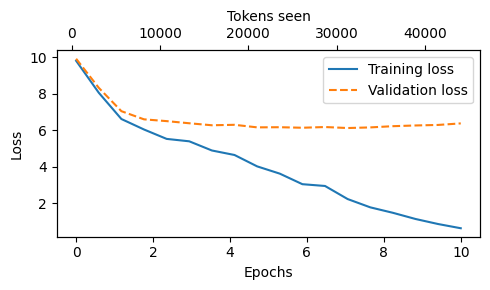

In [161]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="--", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)


CONTROL TEXT GENERATION RANDOMNESS

In [162]:
model.to("cpu")
model.eval()
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"




In [163]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v: k for k, v in vocab.items()}
inverse_vocab


{0: 'closer',
 1: 'every',
 2: 'effort',
 3: 'forward',
 4: 'inches',
 5: 'moves',
 6: 'pizza',
 7: 'toward',
 8: 'you'}

In [164]:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)
probas = torch.softmax(next_token_logits, dim=0)
probas

tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
        1.0120e-04, 3.5758e-01, 4.0122e-03])

In [165]:
next_token_id = torch.argmax(probas).item()
next_token_id

3

In [166]:
inverse_vocab[next_token_id]

'forward'

In [167]:
next_token_id=torch.multinomial(probas,num_samples=1).item()
print(inverse_vocab[next_token_id])

toward


In [168]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)  # Manual seed for reproducibility
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))

    for i, freq in enumerate(sampled_ids):
        print(f"freq {freq} × {inverse_vocab[i]}")

print_sampled_tokens(probas)


freq 71 × closer
freq 2 × every
freq 0 × effort
freq 544 × forward
freq 2 × inches
freq 1 × moves
freq 0 × pizza
freq 376 × toward
freq 4 × you


In [169]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

temperatures = [1, 0.1, 5]

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]


In [170]:
scaled_probas

[tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
         1.0120e-04, 3.5758e-01, 4.0122e-03]),
 tensor([1.8530e-10, 3.5189e-26, 2.6890e-38, 9.9099e-01, 5.7569e-23, 4.4220e-37,
         2.9718e-38, 9.0133e-03, 2.8514e-22]),
 tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])]

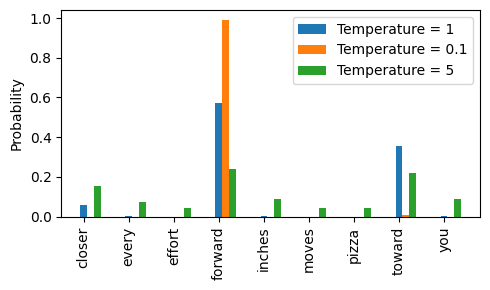

In [171]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()


In [172]:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)


In [175]:
top_k = 3
top_logits,top_pos=torch.topk(next_token_logits, top_k)

In [176]:
new_logits = torch.where(
    condition=next_token_logits < top_logits[-1],
    input=torch.tensor(float("-inf")),
    other=next_token_logits
)
new_logits


tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])

In [177]:
torch.softmax(new_logits, dim=0)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])

In [178]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]

        with torch.no_grad():
            logits = model(idx_cond)

        logits = logits[:, -1, :]

        if top_k is not None:
            top_logits, top_pos = torch.topk(logits, top_k)
            new_logits = torch.where(
                condition=logits < top_logits[:, -1],
                input=torch.tensor(float("-inf")),
                other=logits,
            )
            logits = new_logits

        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch, 1)

        if idx_next == eos_id:
            break

        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx


In [179]:
torch.manual_seed(123)

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you know began to go a little wild--I was such a good; and


In [180]:
torch.save(model.state_dict(), "model.pth")

LOADING PRE-TRAINED WEIGHTS FROM OPEN-AI

In [181]:
!pip install tqdm

In [183]:
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm

In [184]:
def download_and_load_gpt2(model_size, models_dir):
    # Validate model size
    allowed_sizes = ("124M", "355M", "774M", "1558M")
    if model_size not in allowed_sizes:
        raise ValueError(f"Model size not in {allowed_sizes}")

    # Define paths
    model_dir = os.path.join(models_dir, model_size)
    base_url = "https://openaipublic.blob.core.windows.net/gpt-2/models"
    backup_base_url = "https://f001.backblazeb2.com/file/LLMs-from-scratch/gpt2"
    filenames = [
        "checkpoint", "encoder.json", "hparams.json",
        "model.ckpt.data-00000-of-00001", "model.ckpt.index",
        "model.ckpt.meta", "vocab.bpe"
    ]

    # Download files
    os.makedirs(model_dir, exist_ok=True)
    for filename in filenames:
        file_url = os.path.join(base_url, model_size, filename)
        backup_url = os.path.join(backup_base_url, model_size, filename)
        file_path = os.path.join(model_dir, filename)
        download_file(file_url, file_path, backup_url)

    # Load settings and params
    tf_ckpt_path = tf.train.latest_checkpoint(model_dir)
    settings = json.load(open(os.path.join(model_dir, "hparams.json"), "r", encoding="utf-8"))
    params = load_gpt2_params_from_tf_ckpt(tf_ckpt_path, settings)

    return settings, params

In [185]:
def download_file(url, destination, backup_url=None):
    def _attempt_download(download_url):
        with urllib.request.urlopen(download_url) as response:
            # Get the total file size from headers, defaulting to 0 if not present
            file_size = int(response.headers.get("Content-Length", 0))

            # Check if file exists and has the same size
            if os.path.exists(destination):
                file_size_local = os.path.getsize(destination)
                if file_size == file_size_local:
                    print(f"File already exists and is up-to-date: {destination}")
                    return True  # Indicate success without re-downloading

            block_size = 1024  # 1 Kilobyte

            # Initialize the progress bar with total file size
            progress_bar_description = os.path.basename(download_url)
            with tqdm(total=file_size, unit="iB", unit_scale=True, desc=progress_bar_description) as progress_bar:
                with open(destination, "wb") as file:
                    while True:
                        chunk = response.read(block_size)
                        if not chunk:
                            break
                        file.write(chunk)
                        progress_bar.update(len(chunk))
            return True

    try:
        if _attempt_download(url):
            return
    except (urllib.error.HTTPError, urllib.error.URLError):
        if backup_url is not None:
            print(f"Primary URL ({url}) failed. Attempting backup URL: {backup_url}")
            try:
                if _attempt_download(backup_url):
                    return
            except urllib.error.HTTPError:
                pass

        # If we reach here, both attempts have failed
        error_message = (
            f"Failed to download from both primary URL ({url})"
            f"{' and backup URL (' + backup_url + ')' if backup_url else ''}."
            "\nCheck your internet connection or the file availability.\n"
            "For help, visit: https://github.com/rasbt/LLMs-from-scratch/discussions/273"
        )
        print(error_message)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [186]:
def load_gpt2_params_from_tf_ckpt(ckpt_path, settings):
    # Initialize parameters dictionary with empty blocks for each layer
    params = {"blocks": [{} for _ in range(settings["n_layer"])]}

    # Iterate over each variable in the checkpoint
    for name, _ in tf.train.list_variables(ckpt_path):
        # Load the variable and remove singleton dimensions
        variable_array = np.squeeze(tf.train.load_variable(ckpt_path, name))

        # Process the variable name to extract relevant parts
        variable_name_parts = name.split("/")[1:]  # Skip the 'model/' prefix

        # Identify the target dictionary for the variable
        target_dict = params
        if variable_name_parts[0].startswith("h"):
            layer_number = int(variable_name_parts[0][1:])
            target_dict = params["blocks"][layer_number]

        # Recursively access or create nested dictionaries
        for key in variable_name_parts[1:-1]:
            target_dict = target_dict.setdefault(key, {})

        # Assign the variable array to the last key
        last_key = variable_name_parts[-1]
        target_dict[last_key] = variable_array

    return params

In [187]:
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 140kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.70MiB/s]
hparams.json: 100%|██████████| 90.0/90.0 [00:00<00:00, 123kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 498M/498M [00:31<00:00, 15.8MiB/s]
model.ckpt.index: 100%|██████████| 5.21k/5.21k [00:00<00:00, 6.48MiB/s]
model.ckpt.meta: 100%|██████████| 471k/471k [00:00<00:00, 1.92MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 1.86MiB/s]


In [188]:
print(settings)

{'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}


In [190]:
print(params.keys())

dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [191]:
print(params["wte"])
print(params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
(50257, 768)


In [192]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,        # Vocabulary size
    "context_length": 256,      # Context length
    "emb_dim": 768,             # Embedding dimension
    "n_heads": 12,              # Number of attention heads
    "n_layers": 12,             # Number of layers
    "drop_rate": 0.1,           # Dropout rate
    "qkv_bias": False           # Query–Key–Value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768,  "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})

gpt = GPTModel(NEW_CONFIG)
gpt.eval()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention2(
        (W_query): Linear(in_features

In [193]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))


In [194]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])

    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])


load_weights_into_gpt(gpt, params)
gpt.to(device);

In [195]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you as far as the hand can go until the end of your turn unless something happens

This would remove you from a battle
